In [1]:
import fireducks.pandas as pd 

In [2]:
df_original = pd.read_csv("train.csv")

In [3]:
df_original.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
df_original.info()

<class 'fireducks.pandas.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.6+ MB


In [6]:
df_original.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [8]:
df_original.shape

(230130, 6)

In [9]:
# We have lots of rows so lets get rid of rows with nulls
df2 = df_original.dropna()
df2.shape

(221259, 6)

In [11]:
df2.head()

,id,date,country,store,product,num_sold
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0


In [18]:
df2['country'].value_counts()

country
Finland      38355
Italy        38355
Norway       38355
Singapore    38355
Canada       34109
Kenya        33730
Name: count, dtype: int64

In [17]:
# Value counts for store
print(df2['store'].value_counts())

store
Premium Sticker Mart    75684
Stickers for Less       74044
Discount Stickers       71531
Name: count, dtype: int64


In [16]:
# Value counts for product
print(df2['product'].value_counts())

product
Kaggle                46026
Kaggle Tiers          46026
Kerneler Dark Mode    46025
Kerneler              45962
Holographic Goose     37220
Name: count, dtype: int64


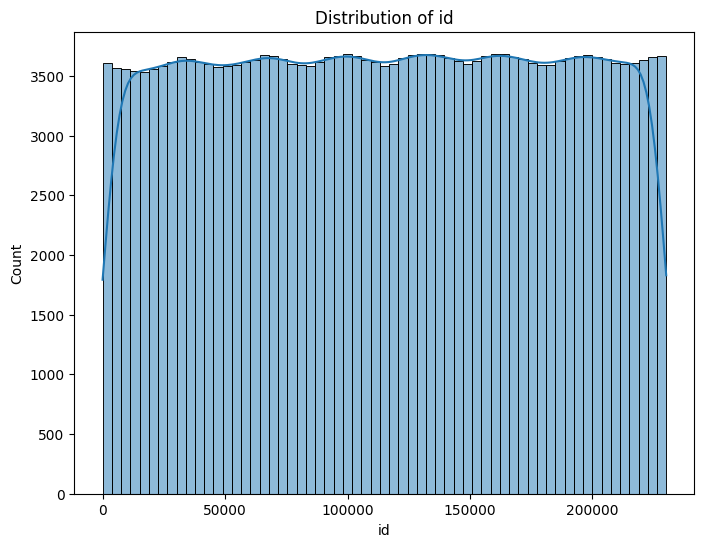

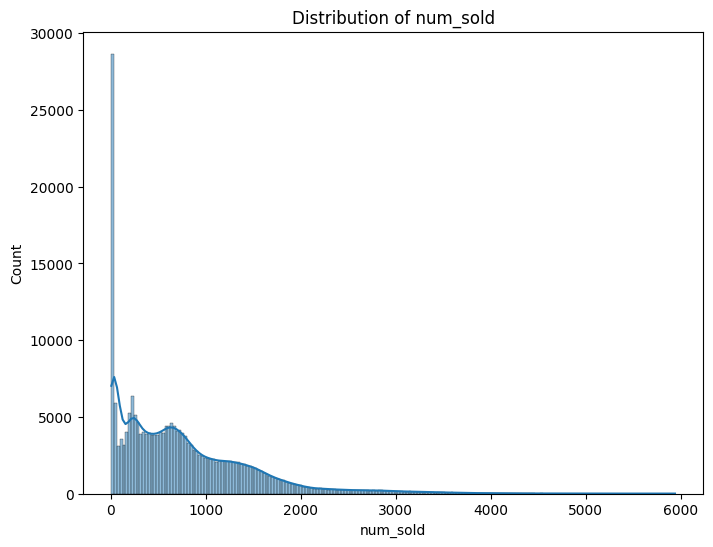

In [21]:
import seaborn as sns

import matplotlib.pyplot as plt

numeric_columns = df2.select_dtypes(include=['number']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

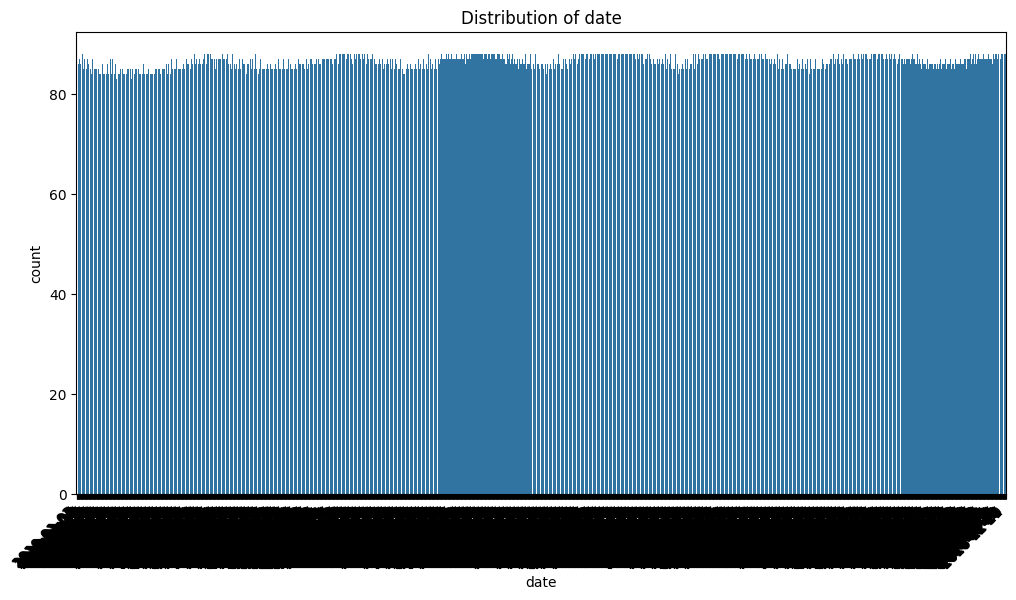

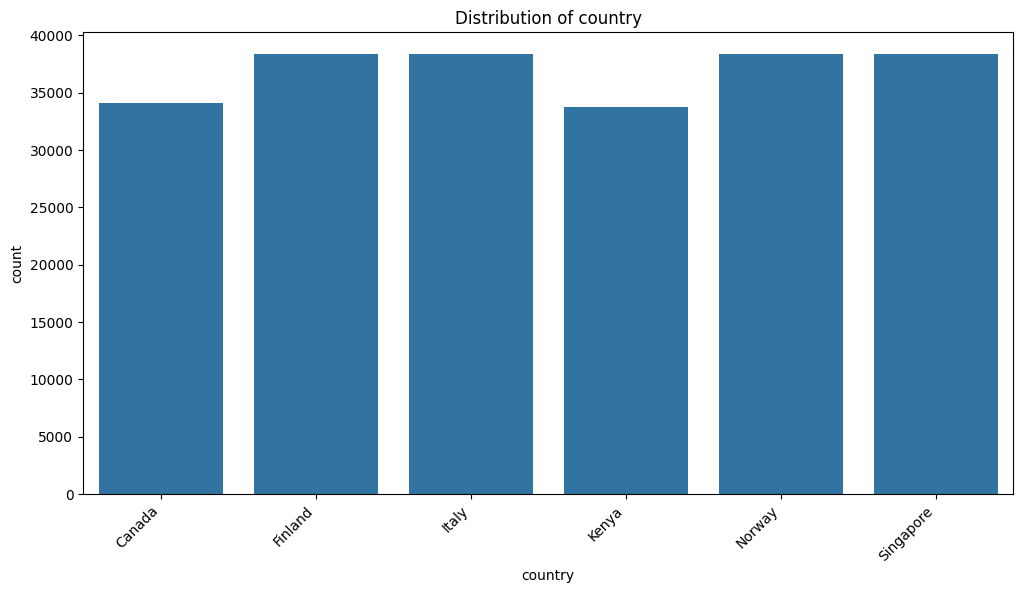

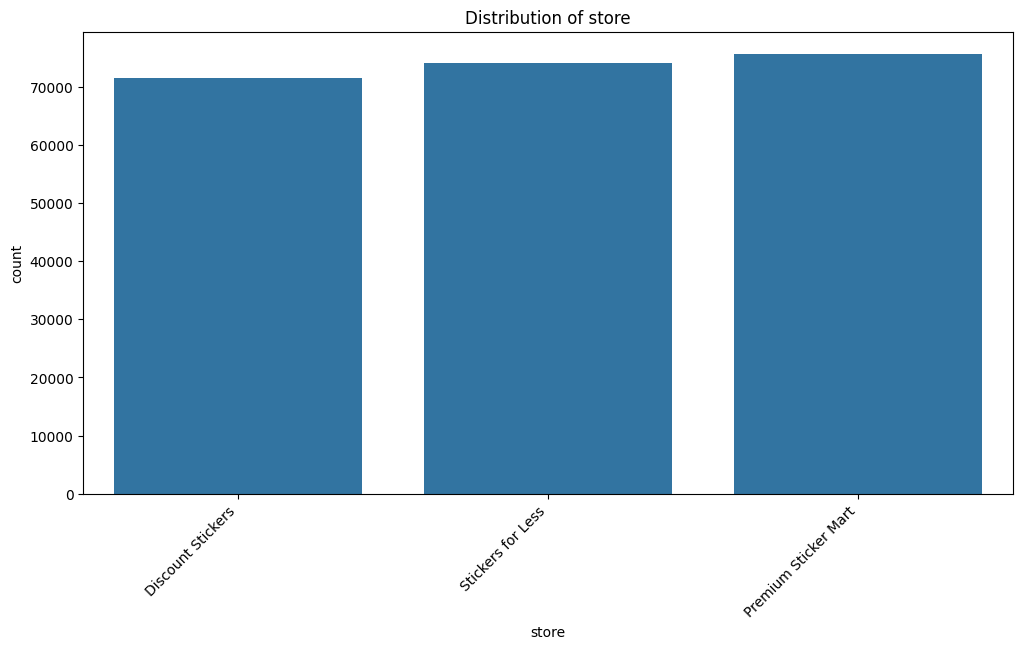

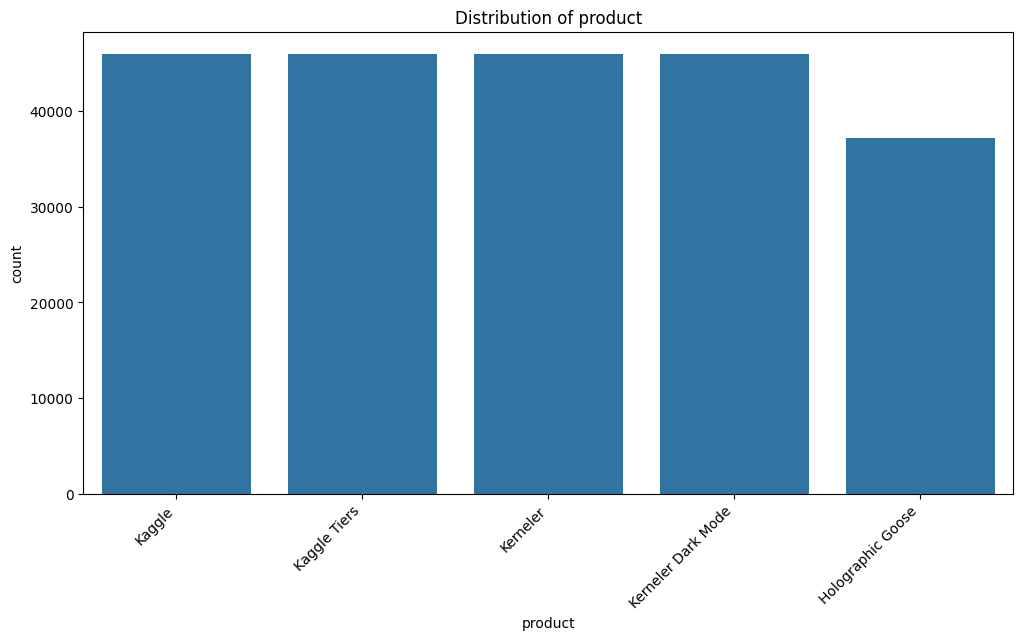

In [22]:
categorical_columns = df2.select_dtypes(exclude=['number']).columns

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df2, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

### There is a imbalance of distributions in num_sold 
- all others look fine 